In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, classification_report, precision_recall_curve, f1_score, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
df = pd.read_csv("train_transaction.csv")

In [3]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


#### Filter transactions that are Mastercard

In [39]:
mastercard = df[df["card4"] == "mastercard"].copy()

In [40]:
mastercard

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,0,15811030,67.505,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.500,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.950,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
mastercard['isFraud'].value_counts()

0    182721
1      6496
Name: isFraud, dtype: int64

In [42]:
#Copy the dataframe to a CSV file for easy re-access
mastercard.to_csv("Mastercard.csv")

In [3]:
mastercard = pd.read_csv("Mastercard.csv")

In [163]:
mastercard.iloc[:,:55].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189217 entries, 0 to 189216
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      189217 non-null  int64  
 1   TransactionID   189217 non-null  int64  
 2   isFraud         189217 non-null  int64  
 3   TransactionDT   189217 non-null  int64  
 4   TransactionAmt  189217 non-null  float64
 5   ProductCD       189217 non-null  object 
 6   card1           189217 non-null  int64  
 7   card2           189027 non-null  float64
 8   card3           189217 non-null  float64
 9   card4           189217 non-null  object 
 10  card5           188480 non-null  float64
 11  card6           189217 non-null  object 
 12  addr1           162924 non-null  float64
 13  addr2           162924 non-null  float64
 14  dist1           76971 non-null   float64
 15  dist2           13217 non-null   float64
 16  P_emaildomain   157197 non-null  object 
 17  R_emaildom

In [4]:
mastercard.drop(columns=['Unnamed: 0'], inplace=True)

### EDA

#### Create a pie chart showing the Valid transactions vs Fraudulent transactions

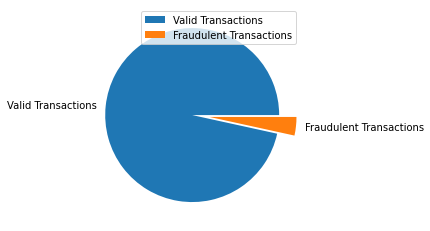

In [5]:
y = np.array([182721, 6496])
texplode = [0, 0.2]
labels = ["Valid Transactions", "Fraudulent Transactions"]
plt.pie(y, labels=labels, explode = texplode)
plt.legend()

### Select a subset of numeric columns for our baseline model

In [6]:
n_mastercard = mastercard.loc[:,['TransactionID','isFraud','TransactionDT','TransactionAmt','card1','card2','card3','card5','addr1','addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']].dropna()


In [7]:
n_mastercard.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
TransactionID,1.000000,-0.013035,0.998238,0.013482,0.013135,-0.002397,-0.061639,-0.058352,-0.000482,0.071091,...,0.020444,-0.003881,-0.015590,-0.015737,0.027617,-0.016462,-0.004219,-0.009999,0.024623,0.004930
isFraud,-0.013035,1.000000,-0.013550,0.029974,-0.003130,0.012420,0.037663,-0.013969,-0.007894,-0.040819,...,-0.023556,0.014530,0.030647,0.045984,-0.024279,0.046849,0.019945,0.032570,-0.017960,0.002196
TransactionDT,0.998238,-0.013550,1.000000,0.012917,0.014173,-0.000503,-0.055736,-0.059652,0.000065,0.064669,...,0.019449,-0.003734,-0.014393,-0.014051,0.026475,-0.014877,-0.003846,-0.008780,0.024201,0.004785
TransactionAmt,0.013482,0.029974,0.012917,1.000000,0.015689,0.033876,-0.025606,-0.037316,-0.003046,0.031843,...,-0.038833,-0.017905,-0.004874,0.000947,-0.040831,-0.001263,-0.017594,-0.005464,-0.049842,-0.029748
card1,0.013135,-0.003130,0.014173,0.015689,1.000000,0.036050,-0.025788,-0.222339,-0.014718,0.024494,...,-0.003749,0.003548,-0.003847,0.010252,-0.010567,0.002715,0.003836,-0.004158,-0.004581,0.002192
card2,-0.002397,0.012420,-0.000503,0.033876,0.036050,1.000000,0.021291,0.010597,0.075640,-0.037795,...,-0.016484,0.003892,0.003931,0.022889,-0.021347,0.022441,0.006131,0.003962,-0.001177,-0.001927
card3,-0.061639,0.037663,-0.055736,-0.025606,-0.025788,0.021291,1.000000,0.035890,0.004143,-0.619950,...,-0.017745,0.011750,0.116902,0.063824,-0.021911,0.072360,0.020415,0.116589,-0.010593,0.001291
card5,-0.058352,-0.013969,-0.059652,-0.037316,-0.222339,0.010597,0.035890,1.000000,0.040717,-0.037969,...,0.022469,0.022150,0.008371,0.001054,0.028113,0.007650,0.017893,0.008284,0.023004,0.020241
addr1,-0.000482,-0.007894,0.000065,-0.003046,-0.014718,0.075640,0.004143,0.040717,1.000000,-0.008934,...,-0.005635,-0.006114,0.003172,0.002419,-0.009007,0.002426,-0.004892,0.003595,-0.006656,-0.005231
addr2,0.071091,-0.040819,0.064669,0.031843,0.024494,-0.037795,-0.619950,-0.037969,-0.008934,1.000000,...,0.020772,-0.006810,-0.109380,-0.058689,0.025889,-0.066608,-0.015149,-0.108882,0.015772,0.003945


In [8]:
#pd.set_option('display.max_columns', None)
n_mastercard.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,1.621620e+05,162162.000000,1.621620e+05,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,...,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000,162162.000000
mean,3.288302e+06,0.021787,7.537523e+06,146.965509,10128.446683,341.926586,150.262620,175.432654,286.331644,86.723197,...,6.358826,6.764334,0.101177,0.830238,5.142247,0.813144,6.788884,0.210592,32.563628,7.141525
std,1.698249e+05,0.145987,4.597126e+06,270.201554,5021.604188,160.302745,3.680045,50.276131,101.965784,3.101463,...,27.325001,34.831014,7.978480,18.920386,17.677678,18.778064,36.245101,10.816598,106.453545,29.079743
min,2.987001e+06,0.000000,8.640100e+04,0.588000,1005.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.145840e+06,0.000000,3.341202e+06,49.000000,6516.000000,194.000000,150.000000,117.000000,204.000000,87.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,3.293060e+06,0.000000,7.598675e+06,77.950000,9992.000000,360.000000,150.000000,197.000000,272.000000,87.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.434245e+06,0.000000,1.139049e+07,146.000000,15066.000000,513.000000,150.000000,224.000000,330.000000,87.000000,...,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,14.000000,3.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18395.000000,598.000000,231.000000,235.000000,540.000000,102.000000,...,349.000000,1155.000000,1156.000000,1725.000000,203.000000,1893.000000,1554.000000,1554.000000,1677.000000,793.000000


In [68]:
# Assign all the numeric features chosen to X, the target column 'isFraud' to y

X, y = n_mastercard.iloc[:,2:], n_mastercard.iloc[:,1]

In [69]:
#Split the data into Train, Validation and Test

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=42, stratify=y_rem)


In [70]:
#Scale the features as there is high variance
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)

In [71]:
#Fit a baseline Logistic Regression model using the scaled features
log = LogisticRegression(solver='saga', C=1.0, max_iter=10000)
log.fit(X_train_sc, y_train)
log_pred = log.predict(X_val_sc)

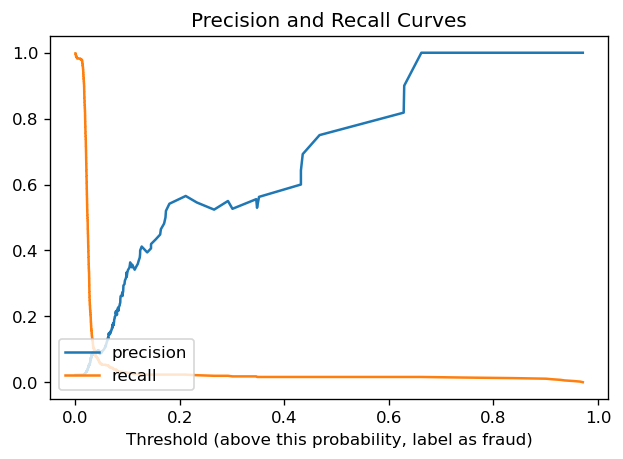

In [72]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, log.predict_proba(X_val_sc)[:,1] )
plt.figure(dpi=120)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [73]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Threshold value is: 0.023875414525262144


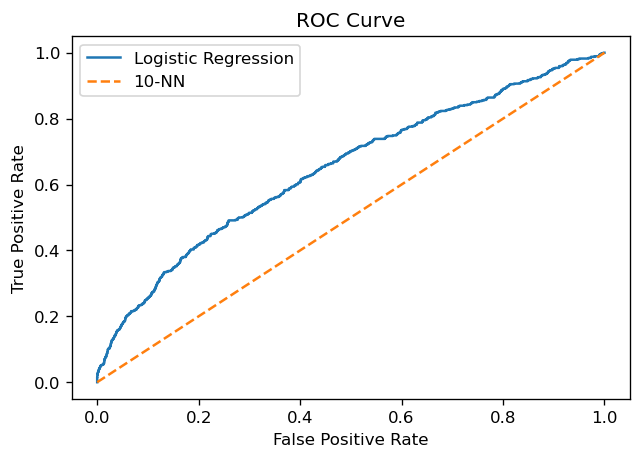

In [83]:
# The choice of threshold calculation is done here by maximizing the True Positive rate while minimizing the False Positive rate

fpr, tpr, thresholds = roc_curve(y_val, log.predict_proba(X_val_sc)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

fpr, tpr, _ = roc_curve(y_val, log.predict_proba(X_val_sc)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])

Text(0.5, 1.0, 'Logistic Regression confusion matrix')

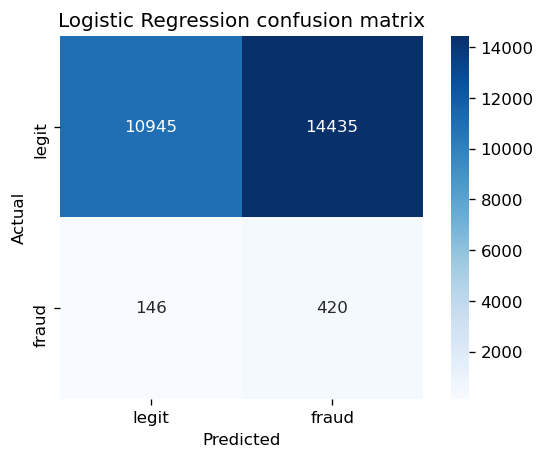

In [79]:
fraud_confusion = confusion_matrix(y_val, log.predict_proba(X_val_sc)[:,1]>=0.02)
plt.figure(dpi=120)
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title("Logistic Regression confusion matrix")

In [80]:
print(classification_report(y_val, log.predict_proba(X_val_sc)[:,1]>=0.02))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     25380
           1       0.03      0.74      0.05       566

    accuracy                           0.44     25946
   macro avg       0.51      0.59      0.33     25946
weighted avg       0.97      0.44      0.59     25946



Since the data is very imbalanced and the threshold value is so low, there is a lot of false positives in this model! Let us fix the imbalance before proceeding with model building

### Oversampling with Random Over Sampler

In [84]:
#Let's try oversampling the positive class using RandomOverSampler
ROS = RandomOverSampler(random_state=42)

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train_sc, y_train)

In [85]:
#Fit Logistic Regression and check the Recall and AUC scores for Train and Validation data sets
#on oversampled data
lr_os = LogisticRegression(solver='saga', max_iter = 10000) 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(y_tr_rs, lr_os.predict(X_tr_rs)), roc_auc_score(y_tr_rs, lr_os.predict_proba(X_tr_rs)[:,1])))


print('Logistic Regression on Oversampled Validation Data; Recall: %.3f, AUC: %.3f' % \
      (recall_score(y_val, lr_os.predict(X_val_sc)), roc_auc_score(y_val, lr_os.predict_proba(X_val_sc)[:,1])))

Logistic Regression on Oversampled Train Data; Test Recall: 0.561, Test AUC: 0.709
Logistic Regression on Oversampled Validation Data; Recall: 0.516, AUC: 0.698


Threshold value is: 0.47313085240287867


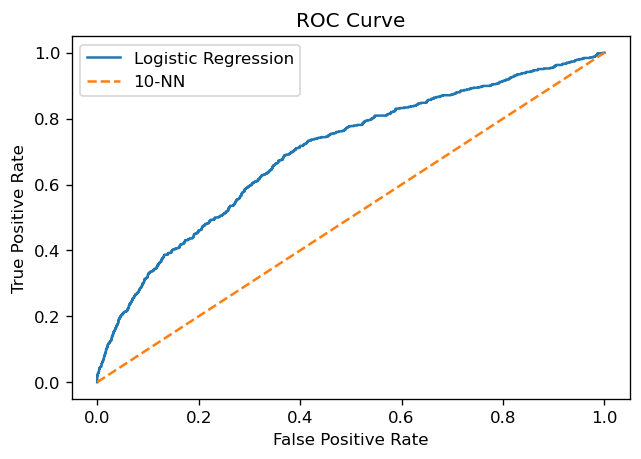

In [86]:
fpr, tpr, thresholds = roc_curve(y_val, lr_os.predict_proba(X_val_sc)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

fpr, tpr, _ = roc_curve(y_val, lr_os.predict_proba(X_val_sc)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])

Text(0.5, 1.0, 'Logistic Regression confusion matrix using ROS')

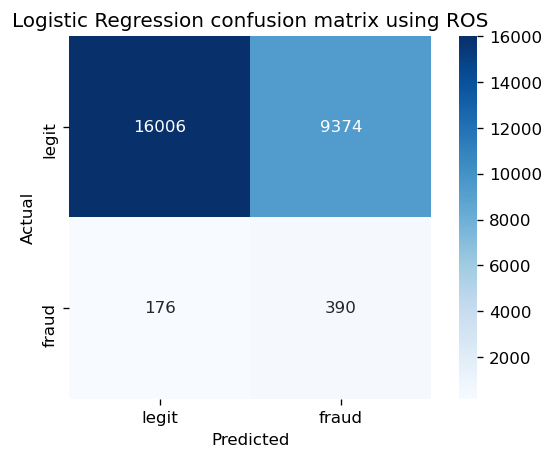

In [90]:
fraud_confusion = confusion_matrix(y_val, lr_os.predict_proba(X_val_sc)[:,1]>=optimal_threshold)
plt.figure(dpi=120)
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title("Logistic Regression confusion matrix using ROS")

In [91]:
print(classification_report(y_val, lr_os.predict_proba(X_val_sc)[:,1]>=optimal_threshold))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     25380
           1       0.04      0.69      0.08       566

    accuracy                           0.63     25946
   macro avg       0.51      0.66      0.42     25946
weighted avg       0.97      0.63      0.76     25946



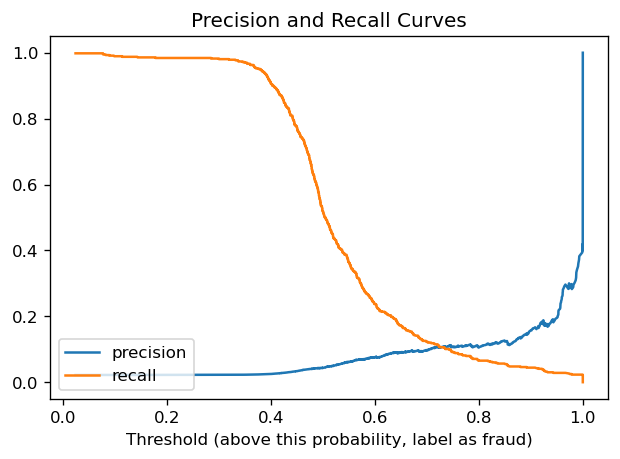

In [92]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lr_os.predict_proba(X_val_sc)[:,1])

plt.figure(dpi=120)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

### Try other algorithms using data from Random Oversampling

In [14]:
rf_ro = RandomForestClassifier()
rf_ro.fit(X_tr_rs,y_tr_rs);

In [15]:
sgd_ro = SGDClassifier()
sgd_ro.fit(X_tr_rs, y_tr_rs);

In [16]:
warnings.filterwarnings(action='ignore', category=UserWarning)

In [17]:
xgb_ro = XGBClassifier(eval_metric='logloss')
xgb_ro.fit(X_tr_rs, y_tr_rs);

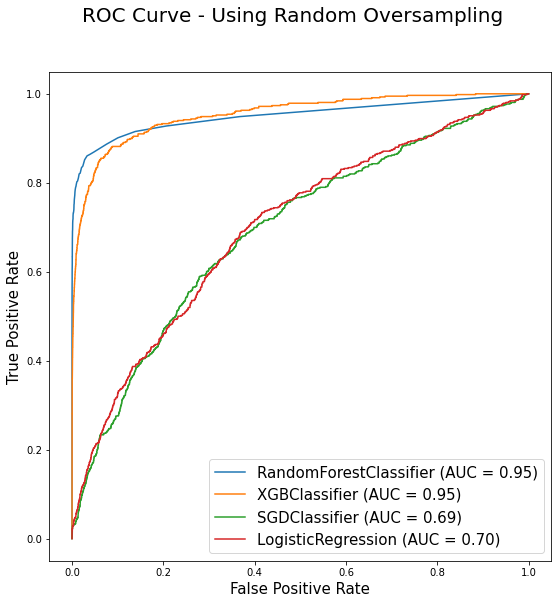

In [30]:
fig, ax1 = plt.subplots(1,1, figsize = (9, 9))
for mod in [rf_ro,xgb_ro,sgd_ro,lr_os]:
    metrics.plot_roc_curve(mod, X_val_sc, y_val, ax=ax1)
plt.suptitle('ROC Curve - Using Random Oversampling', fontsize=20);
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.legend(prop={"size":15})

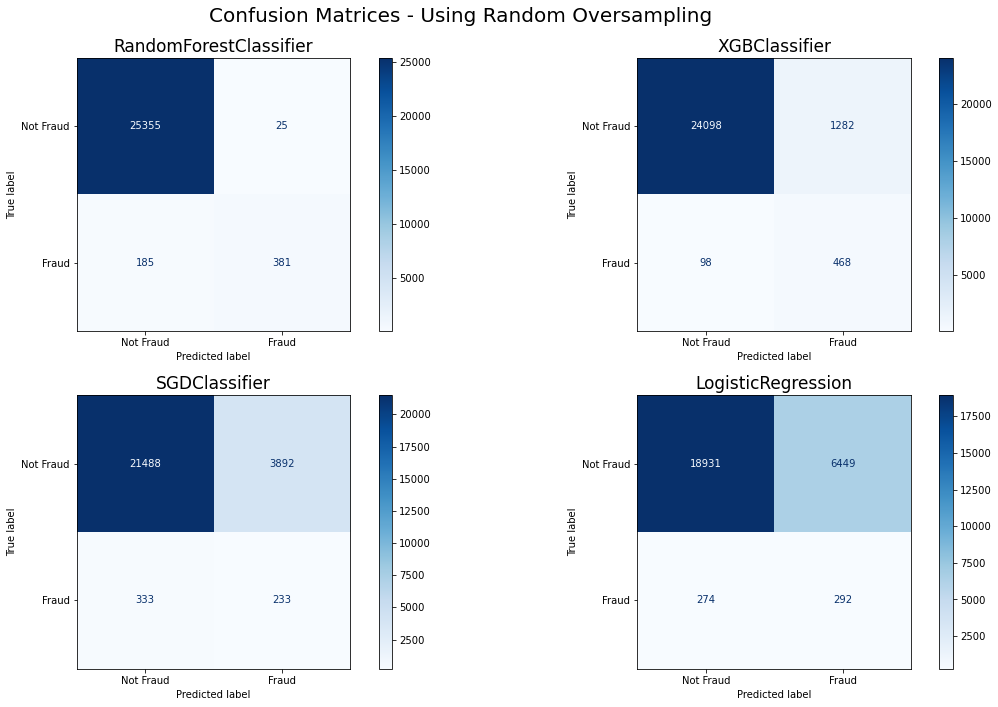

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

for cls, ax in zip([rf_ro,xgb_ro,sgd_ro,lr_os], axes.flatten()):
    plot_confusion_matrix(
        cls, 
        X_val_sc, 
        y_val, 
        ax=ax,
        cmap=plt.cm.Blues,
        display_labels=['Not Fraud','Fraud'])
    ax.title.set_text(type(cls).__name__)
    ax.title.set_size(17)
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.suptitle('Confusion Matrices - Using Random Oversampling', fontsize=20)
plt.tight_layout()
plt.show;

XGBClassifier seems to outperform the other models both in terms of ROC curve and the Recall values.  This is likely an indication of the fact that, the relationship we are trying to model here is not linear. 

Let us proceed to find the threshold for this model.

In [93]:
y_pred_xgb = xgb_ro.predict(X_val_sc)
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     25380
           1       0.27      0.83      0.40       566

    accuracy                           0.95     25946
   macro avg       0.63      0.89      0.69     25946
weighted avg       0.98      0.95      0.96     25946



Threshold value is: 0.3836266


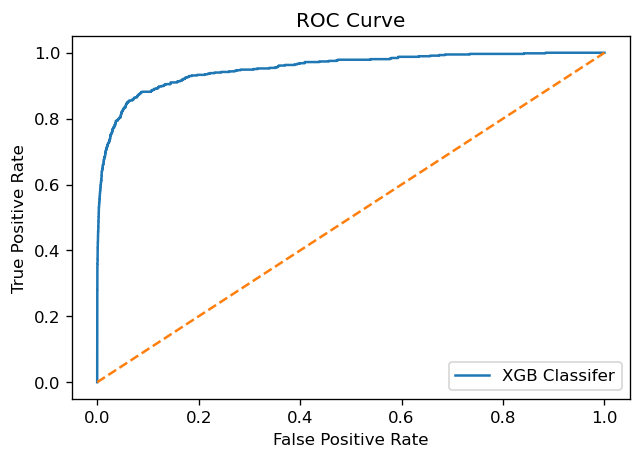

In [97]:
fpr, tpr, thresholds = roc_curve(y_val, xgb_ro.predict_proba(X_val_sc)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

fpr, tpr, _ = roc_curve(y_val, xgb_ro.predict_proba(X_val_sc)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['XGB Classifer'])

In [99]:
print(classification_report(y_val, xgb_ro.predict_proba(X_val_sc)[:,1]>=optimal_threshold))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     25380
           1       0.19      0.88      0.31       566

    accuracy                           0.91     25946
   macro avg       0.59      0.90      0.63     25946
weighted avg       0.98      0.91      0.94     25946



In [100]:
print(classification_report(y_test, xgb_ro.predict_proba(X_test_sc)[:,1]>=optimal_threshold))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95      6346
           1       0.18      0.84      0.30       141

    accuracy                           0.91      6487
   macro avg       0.59      0.88      0.63      6487
weighted avg       0.98      0.91      0.94      6487



Both recall and false positive rate looks better with this model!

### Oversampling using the SMOTE method

In [102]:
smote = SMOTE(random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train_sc, y_train)

lr_smote = LogisticRegression(solver='saga', max_iter=10000) 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Recall: %.3f, AUC: %.3f' % \
      (recall_score(y_tr_smote, lr_smote.predict(X_tr_smote)), roc_auc_score(y_tr_smote, lr_smote.predict_proba(X_tr_smote)[:,1])))

print('Logistic Regression on SMOTE Validation Data; Recall: %.3f, AUC: %.3f' % \
      (recall_score(y_val, lr_smote.predict(X_val_sc)), roc_auc_score(y_val, lr_smote.predict_proba(X_val_sc)[:,1])))


Logistic Regression on SMOTE Train Data; Recall: 0.582, AUC: 0.715
Logistic Regression on SMOTE Validation Data; Recall: 0.546, AUC: 0.698


In [103]:
rf_sm = RandomForestClassifier()
rf_sm.fit(X_tr_smote, y_tr_smote)

xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_sm.fit(X_tr_smote, y_tr_smote)

sgd_sm = SGDClassifier()
sgd_sm.fit(X_tr_smote, y_tr_smote)

SGDClassifier()

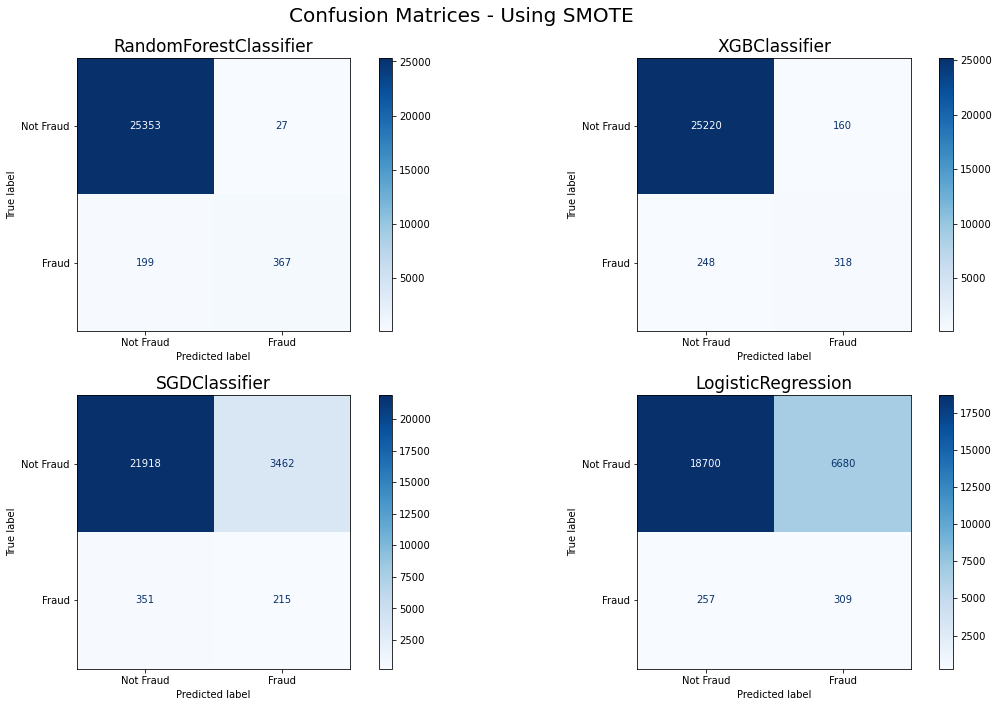

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

for cls, ax in zip([rf_sm,xgb_sm,sgd_sm,lr_smote], axes.flatten()):
    plot_confusion_matrix(
        cls, 
        X_val_sc, 
        y_val, 
        ax=ax,
        cmap=plt.cm.Blues,
        display_labels=['Not Fraud','Fraud'])
    ax.title.set_text(type(cls).__name__)
    ax.title.set_size(17)
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.suptitle('Confusion Matrices - Using SMOTE', fontsize=20)
plt.tight_layout()
plt.show;

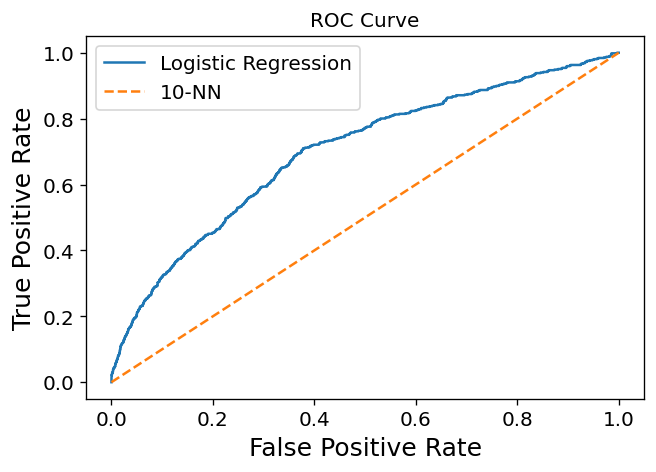

In [105]:
fpr, tpr, _ = roc_curve(y_val, lr_smote.predict_proba(X_val_sc)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])

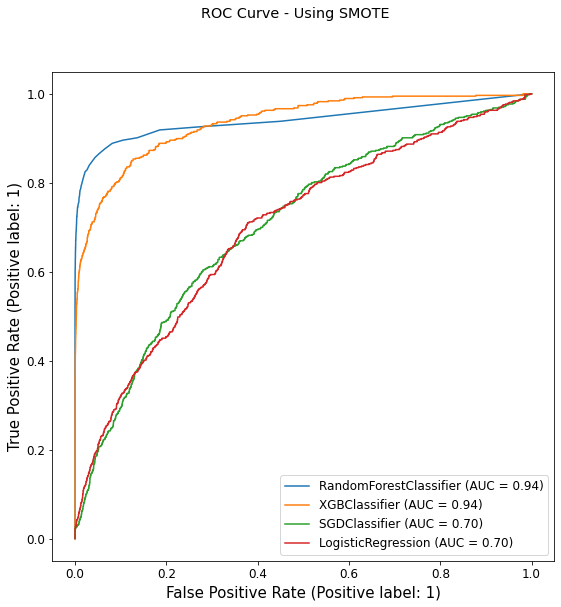

In [106]:
fig, ax1 = plt.subplots(1,1, figsize=(9,9))
for mod in [rf_sm,xgb_sm,sgd_sm,lr_smote]:
    metrics.plot_roc_curve(mod, X_val_sc, y_val, ax=ax1)
plt.suptitle('ROC Curve - Using SMOTE');

Looking at the confusion matrices, using SMOTE seems to perform worse than the Random Over Sampler.

## Feature Engineering and model expansion

In [50]:
mastercard.loc[:, 'ProductCD'].value_counts()

W    142387
C     27418
H      7938
R      7432
S      4042
Name: ProductCD, dtype: int64

In [108]:
all_mastercard = mastercard.loc[:,['TransactionID','isFraud','TransactionDT','TransactionAmt','card1','card2','card3','card5','addr1','addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']].copy()

#Create dummies for the ProductCD column and add it to the DF with just the numeric columns in it
all_mastercard = pd.concat([all_mastercard, pd.get_dummies(mastercard['ProductCD'], drop_first=True)], axis=1)

In [109]:
all_mastercard

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,C9,C10,C11,C12,C13,C14,H,R,S,W
0,2987001,0,86401,29.000,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,1
1,2987003,0,86499,50.000,18132,567.0,150.0,117.0,476.0,87.0,...,1.0,0.0,1.0,0.0,25.0,1.0,0,0,0,1
2,2987004,0,86506,50.000,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,0
3,2987009,0,86536,117.000,17399,111.0,150.0,224.0,204.0,87.0,...,3.0,0.0,1.0,0.0,12.0,2.0,0,0,0,1
4,2987010,0,86549,75.887,16496,352.0,117.0,134.0,NaN,NaN,...,0.0,1.0,2.0,2.0,2.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189212,3577534,0,15811030,67.505,5812,408.0,185.0,224.0,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0
189213,3577536,0,15811049,39.500,10444,225.0,150.0,224.0,204.0,87.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,1
189214,3577537,0,15811079,30.950,12037,595.0,150.0,224.0,231.0,87.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0,1
189215,3577538,0,15811088,117.000,7826,481.0,150.0,224.0,387.0,87.0,...,2.0,0.0,1.0,1.0,5.0,1.0,0,0,0,1


In [25]:
#This is the card type column, as we have filtered to Mastercard transactions all are of that category, 
#so we can ignore this feature

mastercard.loc[:,'card4'].value_counts()

mastercard    189217
Name: card4, dtype: int64

In [26]:
#Since the debit or credit option seems to be so low, we can ignore it
mastercard.loc[:,'card6'].value_counts()

debit              138415
credit              50772
debit or credit        30
Name: card6, dtype: int64

In [110]:
all_mastercard = pd.concat([all_mastercard, pd.get_dummies(mastercard.loc[:,'card6']).iloc[:,:2]], axis=1)


In [111]:
#Analyze the remaining M columns
m_features = ['M1','M2','M3','M4','M5','M6','M7','M8','M9']

mastercard.loc[:,m_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189217 entries, 0 to 189216
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   M1      104067 non-null  object
 1   M2      104067 non-null  object
 2   M3      104067 non-null  object
 3   M4      105639 non-null  object
 4   M5      78395 non-null   object
 5   M6      136214 non-null  object
 6   M7      79983 non-null   object
 7   M8      79987 non-null   object
 8   M9      79987 non-null   object
dtypes: object(9)
memory usage: 13.0+ MB


From the columns above, we can select M1, M2, M3 and M6 as they remaining columns seem to have a high number of null values.

In [112]:
#Checking the values of each of the M features
m_feature_list = ['M1', 'M2', 'M3', 'M6']
for value in m_feature_list:
    print(mastercard[value].value_counts())
    print('\n')

T    104059
F         8
Name: M1, dtype: int64


T    93283
F    10784
Name: M2, dtype: int64


T    81923
F    22144
Name: M3, dtype: int64


F    76131
T    60083
Name: M6, dtype: int64




In [113]:
#Convert the True or False in the M features to 1 and 0
for value in m_feature_list:
    all_mastercard[value]= mastercard[value].apply(lambda x: 1 if x== 'T' else 0)

In [114]:
all_mastercard

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,H,R,S,W,credit,debit,M1,M2,M3,M6
0,2987001,0,86401,29.000,2755,404.0,150.0,102.0,325.0,87.0,...,0,0,0,1,1,0,0,0,0,1
1,2987003,0,86499,50.000,18132,567.0,150.0,117.0,476.0,87.0,...,0,0,0,1,0,1,0,0,0,0
2,2987004,0,86506,50.000,4497,514.0,150.0,102.0,420.0,87.0,...,1,0,0,0,1,0,0,0,0,0
3,2987009,0,86536,117.000,17399,111.0,150.0,224.0,204.0,87.0,...,0,0,0,1,0,1,1,1,1,1
4,2987010,0,86549,75.887,16496,352.0,117.0,134.0,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189212,3577534,0,15811030,67.505,5812,408.0,185.0,224.0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
189213,3577536,0,15811049,39.500,10444,225.0,150.0,224.0,204.0,87.0,...,0,0,0,1,0,1,1,0,0,1
189214,3577537,0,15811079,30.950,12037,595.0,150.0,224.0,231.0,87.0,...,0,0,0,1,0,1,1,0,0,1
189215,3577538,0,15811088,117.000,7826,481.0,150.0,224.0,387.0,87.0,...,0,0,0,1,0,1,1,1,1,1


In [115]:
d_features = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']

mastercard.loc[:,d_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189217 entries, 0 to 189216
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   D1      188799 non-null  float64
 1   D2      100892 non-null  float64
 2   D3      107185 non-null  float64
 3   D4      139588 non-null  float64
 4   D5      91316 non-null   float64
 5   D6      28872 non-null   float64
 6   D7      15781 non-null   float64
 7   D8      23211 non-null   float64
 8   D9      23211 non-null   float64
 9   D10     171727 non-null  float64
 10  D11     101313 non-null  float64
 11  D12     25816 non-null   float64
 12  D13     25202 non-null   float64
 13  D14     23896 non-null   float64
 14  D15     166336 non-null  float64
dtypes: float64(15)
memory usage: 21.7 MB


Based on the number of null values, here again, go with the D features having > 100000 values

In [116]:
for value in ['D1','D2','D3','D4','D10','D11','D15']:
    all_mastercard[value] = mastercard[value]

In [60]:
all_mastercard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189217 entries, 0 to 189216
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   189217 non-null  int64  
 1   isFraud         189217 non-null  int64  
 2   TransactionDT   189217 non-null  int64  
 3   TransactionAmt  189217 non-null  float64
 4   card1           189217 non-null  int64  
 5   card2           189027 non-null  float64
 6   card3           189217 non-null  float64
 7   card5           188480 non-null  float64
 8   addr1           162924 non-null  float64
 9   addr2           162924 non-null  float64
 10  C1              189217 non-null  float64
 11  C2              189217 non-null  float64
 12  C3              189217 non-null  float64
 13  C4              189217 non-null  float64
 14  C5              189217 non-null  float64
 15  C6              189217 non-null  float64
 16  C7              189217 non-null  float64
 17  C8        

In [34]:
all_mastercard.isFraud.value_counts()

0    182721
1      6496
Name: isFraud, dtype: int64

In [35]:
mcard = all_mastercard.dropna()

In [117]:
X, y = all_mastercard.iloc[:,2:], all_mastercard.iloc[:,1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=42, stratify=y_rem)

# We are not scaling as last time because the non numeric features are already one hot encoded due to that scaling 
# is not applicable

In [58]:
mcard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48576 entries, 3 to 189215
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   48576 non-null  int64  
 1   isFraud         48576 non-null  int64  
 2   TransactionDT   48576 non-null  int64  
 3   TransactionAmt  48576 non-null  float64
 4   card1           48576 non-null  int64  
 5   card2           48576 non-null  float64
 6   card3           48576 non-null  float64
 7   card5           48576 non-null  float64
 8   addr1           48576 non-null  float64
 9   addr2           48576 non-null  float64
 10  C1              48576 non-null  float64
 11  C2              48576 non-null  float64
 12  C3              48576 non-null  float64
 13  C4              48576 non-null  float64
 14  C5              48576 non-null  float64
 15  C6              48576 non-null  float64
 16  C7              48576 non-null  float64
 17  C8              48576 non-null

If we remove all the null values in the new dataset, the number of rows reduces drastically, so let's continue to use XGBClassifier as it seems to be doing well based on the prior numerical feature set.

### Fit the XGB model after fixing the imbalance using ROS

In [118]:
ros = RandomOverSampler(random_state=42)
X_tr_sam, y_tr_sam = ros.fit_resample(X_train,y_train)

In [119]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_tr_sam,y_tr_sam);

Threshold value is: 0.36277267


Text(0, 0.5, 'True Positive Rate')

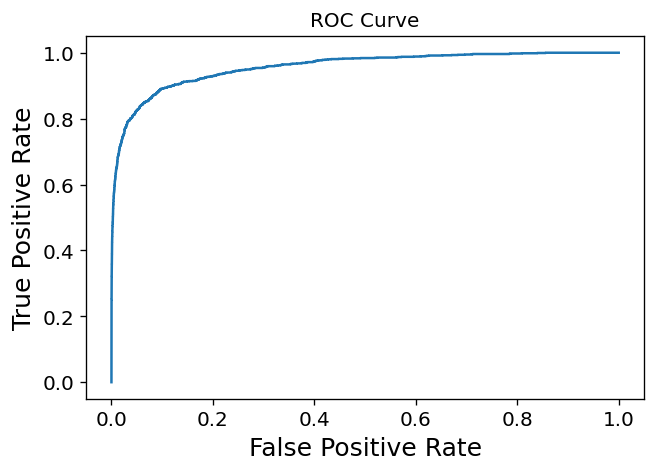

In [121]:
fpr, tpr, thresholds = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

fpr, tpr, _ = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Text(0.5, 1.0, 'XGB confusion matrix using ROS')

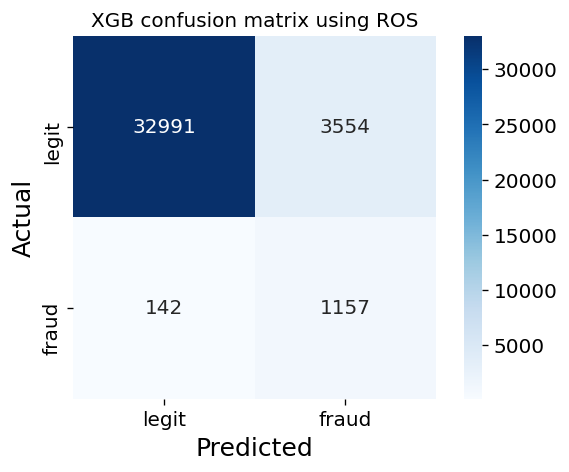

In [136]:
fraud_confusion = confusion_matrix(y_val, xgb.predict_proba(X_val)[:,1]>=0.36277267)
plt.figure(dpi=120)
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title("XGB confusion matrix using ROS")

At a Threshold value of 0.30, Recall seems to be in good shape at 0.901 and False Positive Rate of 12% which is reasonably low.

In [124]:
print(classification_report(y_val, xgb.predict_proba(X_val)[:,1] >= optimal_threshold))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     36545
           1       0.25      0.89      0.39      1299

    accuracy                           0.90     37844
   macro avg       0.62      0.90      0.67     37844
weighted avg       0.97      0.90      0.93     37844



### Tuning Hyperparameters of the model using cross validation using GridSearchCV

In [52]:
params = {
          'max_depth': [7,8],
          'min_child_weight': [1, 1.1],
          'subsample': [0.6, 0.7, 0.8],
          'n_estimators' : [100, 200],
          'objective': ['binary:logistic']
         }
xgb_wos = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_wos.fit(X_train, y_train)

grid_xgb = GridSearchCV(xgb_wos, params, scoring='recall')
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='logloss',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
    

In [125]:
fpr, tpr, thresholds = roc_curve(y_val, grid_xgb.predict_proba(X_val)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.02231643


In [126]:
print(classification_report(y_val, grid_xgb.predict_proba(X_val)[:,1] >= optimal_threshold))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     36545
           1       0.37      0.88      0.52      1299

    accuracy                           0.94     37844
   macro avg       0.68      0.91      0.74     37844
weighted avg       0.97      0.94      0.95     37844



### Further tuning using both GridSearchCV and RandomOversampling using Pipeline

In [66]:
params = {
          'max_depth': [5, 7],
          'min_child_weight': [1, 2, 3],
          'subsample': [0.3, 0.5, 0.7],
          'n_estimators' : [100, 200],
          'objective': ['binary:logistic']
         }

new_params = {'xgbclassifier__' + key: params[key] for key in params}

imba_pipeline = make_pipeline(XGBClassifier(random_state=42, eval_metric='logloss'))

grid_imba = RandomizedSearchCV(imba_pipeline, 
                               param_distributions=new_params,
                               n_iter = 200,
                               cv=5, 
                               scoring='recall',
                               return_train_score=True, 
                               verbose=1)
grid_imba.fit(X_train, y_train)
grid_imba.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'xgbclassifier__subsample': 0.7,
 'xgbclassifier__objective': 'binary:logistic',
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__max_depth': 7}

In [324]:
params = {
          'max_depth': [7,8],
          'min_child_weight': [1, 1.1],
          'subsample': [0.6, 0.7, 0.8],
          'n_estimators' : [100, 200],
          'objective': ['binary:logistic']
         }

new_params = {'xgbclassifier__' + key: params[key] for key in params}

imba_pipeline = make_pipeline(XGBClassifier(random_state=42, eval_metric='logloss'))

grid_imba = GridSearchCV(imba_pipeline, 
                         param_grid=new_params,
                         cv=5, 
                         scoring='recall',
                         return_train_score=True,
                         verbose=1)
grid_imba.fit(X_train, y_train)
grid_imba.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'xgbclassifier__max_depth': 8,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__objective': 'binary:logistic',
 'xgbclassifier__subsample': 0.8}

In [127]:
ROS = RandomOverSampler(sampling_strategy = 1.0, random_state=42)  # Balanced

imba_pipeline2 = make_pipeline(ROS, 
                              XGBClassifier(
                                  use_label_encoder=False, 
                                  n_estimators=200,
                                  max_depth=8,
                                  objective='binary:logistic', 
                                  subsample=0.8,
                                  min_child_weight=1,
                                  random_state=42,
                                  eval_metric='logloss'))


In [128]:
imba_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, sampling_strategy=1.0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=8, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               use_label_encoder=Fals

In [129]:
fpr, tpr, thresholds = roc_curve(y_val, imba_pipeline2.predict_proba(X_val)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.109152116


In [132]:
print(classification_report(y_val, imba_pipeline2.predict_proba(X_val)[:,1] >= optimal_threshold))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     36545
           1       0.35      0.88      0.50      1299

    accuracy                           0.94     37844
   macro avg       0.67      0.91      0.74     37844
weighted avg       0.97      0.94      0.95     37844



Text(0.5, 1.0, 'XGB confusion matrix after parameter tuning')

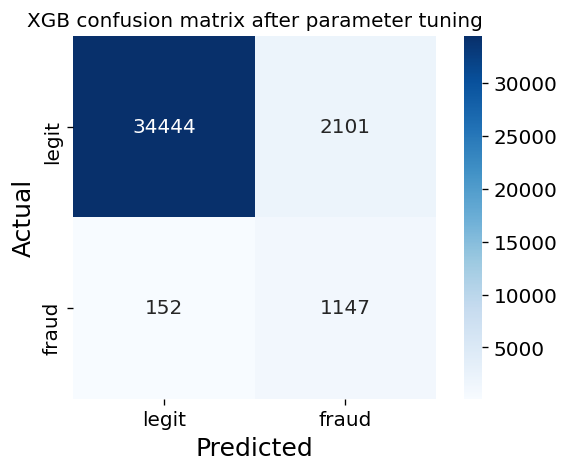

In [133]:
fraud_confusion = confusion_matrix(y_val, imba_pipeline2.predict_proba(X_val)[:,1]>=optimal_threshold)
plt.figure(dpi=120)
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
plt.xlabel('Predicted')
plt.ylabel('Actual');
plt.title("XGB confusion matrix after parameter tuning")

This model seems to be giving better results for both Recall and False Positive Rate.

Text(0, 0.5, 'True Positive Rate')

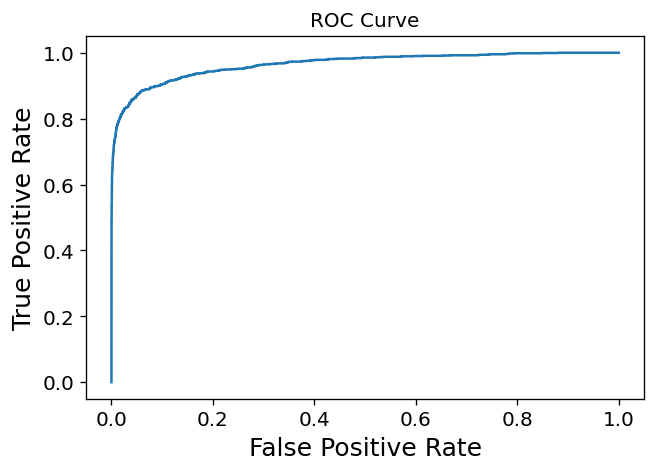

In [134]:
fpr, tpr, _ = roc_curve(y_val, imba_pipeline2.predict_proba(X_val)[:,1])
plt.figure(dpi=120)
plt.plot(fpr, tpr)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Final Model - XGB model with parameters tuned using GridSearch 5 fold cross validation seems to give the optimal results